load 30m poloniex data

In [1]:
cd ..

/home/daniel/python/rl-portfolio-management


In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [3]:
dfs=[]
for infile in glob.glob('./data/bloomberg_data/*.csv'):
    df = pd.read_csv(infile)
    
    # date
    df.index=pd.to_datetime(df.date*1e9)
    del df['date']
    # just the cols from jiang 2017
    df = df[['close','high','low','open']]
    df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [4]:
# sort by time lengths
dfs.sort(key=lambda x:len(x), reverse=True)
[(df.name,df.index[0]) for df in dfs]

[('djindu', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('gs_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('ba_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('msft_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('jpm_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('trv_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('csco_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('utx_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('cat_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('ge_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('axp_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('aapl_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('mmm_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('intc_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('ibm_data', Timestamp('2017-07-06 14:30:00', freq='30T')),
 ('v_data', Timestamp('2017-07-06 14:30:00', freq='30T'))]

In [5]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)

In [6]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2018-07-01')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-08-15')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-08-09')]

# also only ones that are in BTC
#dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
print([str(min(df.index)) for df in dfs1])

['2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00', '2017-07-06 14:30:00']


In [7]:
# something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
blacklist = ['DOGEBTC', 'XRPBTC']
dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [8]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 16 to 16


In [9]:
# reindex
mi = dfs1[0].index.copy()
for i in range(len(dfs1)):
    name = dfs1[i].name
    dfs[i]=dfs1[i].reindex(mi, method='pad')
    dfs[i][np.isnan(dfs[i])]=0
    dfs[i].name = name

In [10]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Stock','Price'])
df

Stock                  djindu                               gs_data          \
Price                   close      high       low      open   close    high   
date                                                                          
2017-07-06 14:30:00  21362.26  21433.10  21353.34  21423.93  225.83  228.48   
2017-07-06 15:00:00  21369.59  21377.98  21338.16  21362.65  227.39  227.59   
2017-07-06 15:30:00  21372.10  21383.21  21358.45  21369.45  227.18  227.32   
2017-07-06 16:00:00  21389.13  21414.87  21373.35  21375.33  227.05  227.79   
2017-07-06 16:30:00  21405.05  21407.29  21385.98  21389.71  227.51  227.68   
2017-07-06 17:00:00  21380.17  21410.59  21377.54  21405.21  227.68  228.14   
2017-07-06 17:30:00  21389.61  21395.82  21378.70  21380.00  228.51  228.52   
2017-07-06 18:00:00  21415.60  21417.04  21389.74  21389.81  229.90  229.95   
2017-07-06 18:30:00  21382.62  21415.63  21378.97  21415.57  228.62  230.06   
2017-07-06 19:00:00  21360.14  21384.08  21346.11  21382.76  228.11  228.64   
2017-07-06 19:30:00  21359.34  21362.29  21343.57  21360.26  227.49  228.07   
2017-07-06 20:00:00  21332.26  21362.71  21332.26  21359.35  227.02  227.59   
2017-07-06 20:30:00  21323.12  21335.29  21305.38  21332.27  226.62  227.06   
2017-07-06 21:00:00  21320.04  21323.54  21320.04  21323.33     NaN     NaN   
2017-07-06 21:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-06 22:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-06 22:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-06 23:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-06 23:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 00:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 00:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 01:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 01:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 02:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 02:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 03:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 03:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 04:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 04:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2017-07-07 05:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
...                       ...       ...       ...       ...     ...     ...   
2018-03-12 05:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 06:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 06:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 07:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 07:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 08:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 08:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 09:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 09:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 10:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 10:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 11:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 11:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 12:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 12:30:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 13:00:00       NaN       NaN       NaN       NaN     NaN     NaN   
2018-03-12 13:30:00  25416.23  25449.15  25367.66 

In [11]:
# crop to when they all exist
print('cropped from', len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
print('to',len(df))

cropped from 11964
to 11963


In [12]:
# fill in na's
#df = df.fillna(method="pad")

#Dropping na's instead
df = df.dropna()

# replace rest
df.replace(np.nan, 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
df

Stock                      djindu                                            \
Price                       close          high           low          open   
date                                                                          
2017-07-06 15:00:00  21369.589844  21377.980469  21338.160156  21362.650391   
2017-07-06 15:30:00  21372.099609  21383.210938  21358.449219  21369.449219   
2017-07-06 16:00:00  21389.130859  21414.869141  21373.349609  21375.330078   
2017-07-06 16:30:00  21405.050781  21407.289062  21385.980469  21389.710938   
2017-07-06 17:00:00  21380.169922  21410.589844  21377.539062  21405.210938   
2017-07-06 17:30:00  21389.609375  21395.820312  21378.699219  21380.000000   
2017-07-06 18:00:00  21415.599609  21417.039062  21389.740234  21389.810547   
2017-07-06 18:30:00  21382.619141  21415.630859  21378.970703  21415.570312   
2017-07-06 19:00:00  21360.140625  21384.080078  21346.109375  21382.759766   
2017-07-06 19:30:00  21359.339844  21362.289062  21343.570312  21360.259766   
2017-07-06 20:00:00  21332.259766  21362.710938  21332.259766  21359.349609   
2017-07-06 20:30:00  21323.119141  21335.289062  21305.380859  21332.269531   
2017-07-07 14:30:00  21386.410156  21397.160156  21350.720703  21354.660156   
2017-07-07 15:00:00  21375.609375  21389.429688  21352.779297  21385.960938   
2017-07-07 15:30:00  21373.470703  21390.509766  21370.000000  21375.640625   
2017-07-07 16:00:00  21390.800781  21394.189453  21366.810547  21373.449219   
2017-07-07 16:30:00  21407.580078  21412.769531  21385.060547  21390.810547   
2017-07-07 17:00:00  21418.580078  21425.759766  21403.509766  21407.609375   
2017-07-07 17:30:00  21410.710938  21421.599609  21406.099609  21418.689453   
2017-07-07 18:00:00  21415.890625  21417.750000  21408.810547  21410.800781   
2017-07-07 18:30:00  21423.910156  21425.820312  21413.369141  21416.099609   
2017-07-07 19:00:00  21410.789062  21425.820312  21407.720703  21424.279297   
2017-07-07 19:30:00  21408.220703  21418.890625  21407.759766  21410.619141   
2017-07-07 20:00:00  21411.359375  21412.640625  21399.589844  21408.330078   
2017-07-07 20:30:00  21413.039062  21424.029297  21406.570312  21411.089844   
2017-07-10 14:30:00  21393.169922  21405.720703  21371.109375  21381.230469   
2017-07-10 15:00:00  21410.050781  21418.089844  21391.669922  21392.380859   
2017-07-10 15:30:00  21430.599609  21431.890625  21400.240234  21410.669922   
2017-07-10 16:00:00  21420.119141  21437.460938  21417.240234  21430.910156   
2017-07-10 16:30:00  21430.160156  21431.210938  21417.820312  21420.089844   
...                           ...           ...           ...           ...   
2018-03-08 19:00:00  24766.689453  24769.910156  24724.539062  24761.400391   
2018-03-08 19:30:00  24839.619141  24841.330078  24743.330078  24766.449219   
2018-03-08 20:00:00  24887.509766  24908.410156  24837.160156  24837.160156   
2018-03-08 20:30:00  24893.630859  24900.130859  24781.339844  24888.259766   
2018-03-09 14:30:00  25063.720703  25076.699219  25004.890625  25004.890625   
2018-03-09 15:00:00  25097.500000  25115.240234  25040.130859  25060.900391   
2018-03-09 15:30:00  25147.199219  25177.980469  25091.470703  25098.539062   
2018-03-09 16:00:00  25184.650391  25187.109375  25139.849609  25147.320312   
2018-03-09 16:30:00  25173.720703  25194.949219  25160.189453  25186.800781   
2018-03-09 17:00:00  25220.890625  25240.529297  25173.310547  25173.630859   
2018-03-09 17:30:00  25219.570312  25247.439453  25214.380859  25220.640625   
2018-03-09 18:00:00  25272.609375  25282.099609  25220.849609  25220.849609   
2018-03-09 18:30:00  25269.939453  25279.880859  25257.300781  25274.529297   
2018-03-09 19:00:00  25261.359375  25300.310547  25243.550781  25271.710938   
2018-03-09 19:30:00  25271.640625  25282.720703  25256.130859  25261.349609   
2018-03-09 20:00:00  25273.630859  25285.650391  25251.439453  25271.740234   
2018-03-09 20:30:00  25332.990234  25336.330078  2

In [13]:
# check stats
df.describe()

Stock        djindu                                                gs_data  \
Price         close          high           low          open        close   
count   2229.000000   2229.000000   2229.000000   2229.000000  2229.000000   
mean   23518.007812  23538.953125  23494.859375  23517.318359   242.742599   
std     1474.963257   1483.813965   1466.188477   1475.489014    15.453591   
min    21315.919922  21335.289062  21279.300781  21314.300781   214.759995   
25%    22046.750000  22059.269531  22031.929688  22045.849609   227.990005   
50%    23425.880859  23437.300781  23410.230469  23425.509766   241.880005   
75%    24778.589844  24803.310547  24759.160156  24778.640625   255.880005   
max    26609.990234  26610.029297  26558.910156  26584.279297   274.970001   

Stock                                             ba_data               \
Price         high          low         open        close         high   
count  2229.000000  2229.000000  2229.000000  2229.000000  2229.000000   
mean    243.256866   242.208252   242.733063   277.238892   277.842682   
std      15.552592    15.339850    15.447168    45.163486    45.491718   
min     215.460007   214.669998   214.720001   201.440002   201.720001   
25%     228.429993   227.619995   228.009995   240.399994   240.929993   
50%     242.300003   241.490005   241.929993   262.399994   262.619995   
75%     256.299988   255.360001   255.889999   313.089996   314.500000   
max     275.290009   274.010010   274.820007   371.190002   371.510010   

Stock     ...         intc_data                  ibm_data               \
Price     ...               low         open        close         high   
count     ...       2229.000000  2229.000000  2229.000000  2229.000000   
mean      ...         41.458630    41.554752   151.742126   151.971603   
std       ...          5.063719     5.102764     6.838973     6.887935   
min       ...         33.240002    33.270000   139.419998   139.710007   
25%       ...         36.250000    36.310001   145.710007   145.860001   
50%       ...         43.169998    43.330002   152.419998   152.619995   
75%       ...         45.639999    45.759998   155.419998   155.679993   
max       ...         52.150002    52.174999   169.589996   171.119995   

Stock                                 v_data                            \
Price          low         open        close         high          low   
count  2229.000000  2229.000000  2229.000000  2229.000000  2229.000000   
mean    151.516541   151.751465   110.327576   110.502090   110.139763   
std       6.793560     6.840248     8.211316     8.260456     8.157776   
min     139.139999   139.440002    93.279999    93.360001    93.190002   
25%     145.550003   145.679993   103.699997   103.800003   103.599998   
50%     152.169998   152.419998   109.964996   110.059998   109.779999   
75%     155.100006   155.429993   117.059998   117.529999   116.800003   
max     169.300003   170.070007   126.290001   126.739998   125.889999   

Stock               
Price         open  
count  2229.000000  
mean    110.323776  
std       8.211818  
min      93.339996  
25%     103.699997  
50%     109.980003  
75%     117.040001  
max     126.459999  

[8 rows x 64 columns]

In [14]:
assert np.isfinite(df.as_matrix()).all()

In [15]:
# split
test_split=0.15
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
#df_test = df_test.iloc[0:99:, :].append(df_test.iloc[100::2, :])
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 333 train#: 1896 test_frac: 0.14939434724091522 cutoff_time: 2018-02-02 16:30:00


In [16]:
df_test60 = df_test.resample('60T').sum()
df_test60 = df_test60.replace(0,np.nan).dropna()

df_test120 = df_test.resample('120T').sum()
df_test120 = df_test120.replace(0,np.nan).dropna()
df_test120

Stock                       djindu                                \
Price                        close           high            low   
date                                                               
2018-02-02 16:00:00   51654.980469   51715.921875   51554.421875   
2018-02-02 18:00:00  102771.351562  103055.429688  102687.593750   
2018-02-02 20:00:00   51119.078125   51272.421875   51035.078125   
2018-02-05 14:00:00   76304.906250   76380.500000   75857.210938   
2018-02-05 16:00:00  101308.148438  101644.453125  101189.187500   
2018-02-05 18:00:00  100056.109375  100672.062500   99826.000000   
2018-02-05 20:00:00   49118.851562   49583.218750   48267.179688   
2018-02-06 14:00:00   73096.390625   73789.460938   72041.023438   
2018-02-06 16:00:00   97562.031250   97929.437500   97061.789062   
2018-02-06 18:00:00   97605.843750   97911.187500   97001.796875   
2018-02-06 20:00:00   49704.296875   49804.589844   49371.898438   
2018-02-07 14:00:00   75285.289062   75424.523438   74825.210938   
2018-02-07 16:00:00  100736.046875  100999.640625  100533.593750   
2018-02-07 18:00:00  100157.750000  100453.382812   99726.023438   
2018-02-07 20:00:00   50040.230469   50358.671875   49881.242188   
2018-02-08 14:00:00   73985.109375   74420.562500   73833.648438   
2018-02-08 16:00:00   97659.992188   98320.187500   97396.179688   
2018-02-08 18:00:00   97464.140625   97859.992188   97123.234375   
2018-02-08 20:00:00   48125.300781   48678.539062   48038.132812   
2018-02-09 14:00:00   71986.851562   72386.851562   71595.570312   
2018-02-09 16:00:00   94754.648438   95327.570312   94449.484375   
2018-02-09 18:00:00   94821.312500   95480.140625   94195.109375   
2018-02-09 20:00:00   48152.800781   48393.410156   47659.921875   
2018-02-12 14:00:00   73197.210938   73507.031250   72937.500000   
2018-02-12 16:00:00   98235.765625   98315.281250   97844.875000   
2018-02-12 18:00:00   98707.703125   98826.906250   98437.093750   
2018-02-12 20:00:00   49317.050781   49508.621094   49199.437500   
2018-02-13 14:00:00   73521.679688   73667.468750   73327.578125   
2018-02-13 16:00:00   97982.398438   98134.750000   97883.671875   
2018-02-13 18:00:00   98593.343750   98686.812500   98348.507812   
...                            ...            ...            ...   
2018-03-01 18:00:00   98445.875000   98791.703125   98135.765625   
2018-03-01 20:00:00   49270.539062   49430.976562   49001.519531   
2018-03-02 14:00:00   72863.257812   73128.257812   72715.367188   
2018-03-02 16:00:00   97761.343750   97803.539062   97306.734375   
2018-03-02 18:00:00   97714.562500   98020.843750   97591.375000   
2018-03-02 20:00:00   48968.468750   49042.593750   48781.132812   
2018-03-05 14:00:00   73435.429688   73514.265625   73218.656250   
2018-03-05 16:00:00   98889.929688   98987.367188   98571.906250   
2018-03-05 18:00:00   99288.171875   99372.671875   99090.257812   
2018-03-05 20:00:00   49772.437500   49898.492188   49750.898438   
2018-03-06 14:00:00   74590.710938   74839.601562   74468.648438   
2018-03-06 16:00:00   99152.109375   99264.867188   98884.062500   
2018-03-06 18:00:00   99524.351562   99709.000000   99407.375000   
2018-03-06 20:00:00   49770.101562   49821.742188   49681.660156   
2018-03-07 14:00:00   74213.570312   74325.718750   73952.953125   
2018-03-07 16:00:00   98507.203125   98789.328125   98382.539062   
2018-03-07 18:00:00   98635.484375   98753.843750   98437.929688   
2018-03-07 20:00:00   49594.601562   49653.101562   49470.132812   
2018-03-08 14:00:00   74548.351562   74694.898438   74460.421875   
2018-03-08 16:00:00   99170.515625   99316.601562   99000.304688   
2018-03-08 18:00:00   99102.718750   99174.429688   98889.921875   
2018-03-08 20:00:00   49781.140625   49808.539062   49618.500000   
2018-03-09 14:00:00   75308.421875   75369.921875   75136.492188   
2018-03-09 16:00:00  100798.828125  100870.031250  100687.734375   
2018-03-09 18:00:00  101075.546875  101145.015625  10097

In [17]:
# save
df_train.to_hdf('./data/bloomberg_30m_vol.hf',key='train', mode='w', append=False)
df_test.to_hdf('./data/bloomberg_30m_vol.hf',key='test', mode='a', append=False)
df_test60.to_hdf('./data/bloomberg_30m_vol.hf',key='test60', mode='a', append=False)
df_test120.to_hdf('./data/bloomberg_30m_vol.hf',key='test120', mode='a', append=False)

df_test

Stock                      djindu                                            \
Price                       close          high           low          open   
date                                                                          
2018-02-02 17:00:00  25856.339844  25859.169922  25759.839844  25784.910156   
2018-02-02 17:30:00  25798.640625  25856.750000  25794.580078  25856.750000   
2018-02-02 18:00:00  25785.310547  25813.859375  25757.429688  25796.160156   
2018-02-02 18:30:00  25746.779297  25800.419922  25723.699219  25786.000000   
2018-02-02 19:00:00  25630.880859  25749.580078  25619.050781  25748.390625   
2018-02-02 19:30:00  25608.380859  25691.570312  25587.410156  25628.199219   
2018-02-02 20:00:00  25612.509766  25656.960938  25544.419922  25607.720703   
2018-02-02 20:30:00  25506.570312  25615.460938  25490.660156  25611.869141   
2018-02-05 14:30:00  25319.449219  25345.919922  25165.599609  25337.869141   
2018-02-05 15:00:00  25496.189453  25520.210938  25290.089844  25317.390625   
2018-02-05 15:30:00  25489.269531  25514.369141  25401.519531  25495.699219   
2018-02-05 16:00:00  25435.810547  25520.529297  25422.390625  25493.099609   
2018-02-05 16:30:00  25378.769531  25433.439453  25316.910156  25433.439453   
2018-02-05 17:00:00  25248.039062  25380.720703  25208.449219  25377.919922   
2018-02-05 17:30:00  25245.529297  25309.759766  25241.439453  25241.939453   
2018-02-05 18:00:00  25069.269531  25244.759766  25037.880859  25244.759766   
2018-02-05 18:30:00  25198.160156  25205.310547  25026.580078  25069.160156   
2018-02-05 19:00:00  25030.310547  25199.550781  25007.310547  25198.410156   
2018-02-05 19:30:00  24758.369141  25022.439453  24754.230469  25022.439453   
2018-02-05 20:00:00  24775.550781  24789.490234  23923.880859  24757.500000   
2018-02-05 20:30:00  24343.300781  24793.730469  24343.300781  24789.480469   
2018-02-06 14:30:00  24520.630859  24712.859375  23778.740234  24085.169922   
2018-02-06 15:00:00  24259.599609  24651.529297  24152.630859  24517.369141   
2018-02-06 15:30:00  24316.160156  24425.070312  24109.650391  24262.080078   
2018-02-06 16:00:00  24237.130859  24369.210938  24182.189453  24316.730469   
2018-02-06 16:30:00  24323.230469  24415.070312  24148.939453  24234.560547   
2018-02-06 17:00:00  24529.269531  24539.179688  24325.779297  24325.779297   
2018-02-06 17:30:00  24472.400391  24605.980469  24404.880859  24525.000000   
2018-02-06 18:00:00  24411.810547  24481.150391  24316.980469  24468.169922   
2018-02-06 18:30:00  24268.830078  24406.130859  24247.960938  24402.119141   
...                           ...           ...           ...           ...   
2018-03-08 19:00:00  24766.689453  24769.910156  24724.539062  24761.400391   
2018-03-08 19:30:00  24839.619141  24841.330078  24743.330078  24766.449219   
2018-03-08 20:00:00  24887.509766  24908.410156  24837.160156  24837.160156   
2018-03-08 20:30:00  24893.630859  24900.130859  24781.339844  24888.259766   
2018-03-09 14:30:00  25063.720703  25076.699219  25004.890625  25004.890625   
2018-03-09 15:00:00  25097.500000  25115.240234  25040.130859  25060.900391   
2018-03-09 15:30:00  25147.199219  25177.980469  25091.470703  25098.539062   
2018-03-09 16:00:00  25184.650391  25187.109375  25139.849609  25147.320312   
2018-03-09 16:30:00  25173.720703  25194.949219  25160.189453  25186.800781   
2018-03-09 17:00:00  25220.890625  25240.529297  25173.310547  25173.630859   
2018-03-09 17:30:00  25219.570312  25247.439453  25214.380859  25220.640625   
2018-03-09 18:00:00  25272.609375  25282.099609  25220.849609  25220.849609   
2018-03-09 18:30:00  25269.939453  25279.880859  25257.300781  25274.529297   
2018-03-09 19:00:00  25261.359375  25300.310547  25243.550781  25271.710938   
2018-03-09 19:30:00  25271.640625  25282.720703  25256.130859  25261.349609   
2018-03-09 20:00:00  25273.630859  25285.650391  25251.439453  25271.740234   
2018-03-09 20:30:00  25332.990234  25336.330078  2

In [18]:
# drop cols and update multiindex
df_train1 = df_train.drop(['volume','quoteVolume'],axis=1,level='Price')
df_train1.columns = pd.MultiIndex.from_tuples(df_train1.columns.tolist(), names=df_train1.columns.names) # update index to remove dropped cols
df_train1 = df_train1.sort_index(axis=1)

df_test1 = df_test.drop(['volume','quoteVolume'],axis=1,level='Price')
df_test1.columns = pd.MultiIndex.from_tuples(df_test1.columns.tolist(), names=df_test1.columns.names)
df_test1 = df_test1.sort_index(axis=1)
df_test1

df_test2 = df_test60.drop(['volume','quoteVolume'],axis=1,level='Price')
df_test2.columns = pd.MultiIndex.from_tuples(df_test2.columns.tolist(), names=df_test2.columns.names)
df_test2 = df_test2.sort_index(axis=1)
df_test2

df_test3 = df_test120.drop(['volume','quoteVolume'],axis=1,level='Price')
df_test3.columns = pd.MultiIndex.from_tuples(df_test3.columns.tolist(), names=df_test3.columns.names)
df_test3 = df_test3.sort_index(axis=1)
df_test3

Stock                 aapl_data                                      \
Price                     close        high         low        open   
date                                                                  
2018-02-02 16:00:00  325.679993  326.200012  325.020020  325.929993   
2018-02-02 18:00:00  647.109985  649.829956  644.929993  648.179993   
2018-02-02 20:00:00  321.960022  323.409973  321.100006  323.049988   
2018-02-05 14:00:00  490.049988  490.630005  483.440002  485.829987   
2018-02-05 16:00:00  646.859985  650.320007  645.450012  648.755005   
2018-02-05 18:00:00  645.419983  648.349976  643.200012  646.290039   
2018-02-05 20:00:00  316.690002  321.309998  312.489990  320.820007   
2018-02-06 14:00:00  474.169983  480.080017  467.030029  471.299988   
2018-02-06 16:00:00  637.109985  639.160034  631.109985  634.349976   
2018-02-06 18:00:00  640.400024  643.330017  635.489990  638.950012   
2018-02-06 20:00:00  325.850006  326.600006  323.589996  324.710022   
2018-02-07 14:00:00  485.750000  488.279999  484.039978  486.690002   
2018-02-07 16:00:00  645.239990  647.729980  644.070007  646.755005   
2018-02-07 18:00:00  643.549988  645.020020  639.690002  643.520020   
2018-02-07 20:00:00  320.579987  322.549988  319.790009  321.524994   
2018-02-08 14:00:00  479.989990  482.190002  478.919983  480.279999   
2018-02-08 16:00:00  638.250000  642.049988  635.809998  639.630005   
2018-02-08 18:00:00  636.569946  639.599976  634.580017  636.335022   
2018-02-08 20:00:00  313.909973  318.390015  313.450012  317.650024   
2018-02-09 14:00:00  470.469971  473.089996  467.290009  471.650024   
2018-02-09 16:00:00  618.029968  622.580017  614.859985  620.070007   
2018-02-09 18:00:00  611.679993  617.299988  606.359985  610.899963   
2018-02-09 20:00:00  311.400024  312.450012  308.220001  309.600006   
2018-02-12 14:00:00  479.770020  481.580017  475.330017  477.400024   
2018-02-12 16:00:00  648.440002  649.260010  645.429993  646.700012   
2018-02-12 18:00:00  651.614990  651.934998  649.570007  651.039978   
2018-02-12 20:00:00  326.299988  327.529999  325.410004  326.710022   
2018-02-13 14:00:00  488.859985  490.119995  486.510010  487.149994   
2018-02-13 16:00:00  651.570007  652.890015  650.539978  652.309998   
2018-02-13 18:00:00  655.559998  656.750000  653.190002  654.040039   
...                         ...         ...         ...         ...   
2018-03-01 18:00:00  698.450012  701.340027  694.239990  699.484985   
2018-03-01 20:00:00  350.369995  351.450012  348.099976  350.299988   
2018-03-02 14:00:00  521.859985  523.710022  519.160034  519.969971   
2018-03-02 16:00:00  701.500000  702.179993  698.239990  700.160034   
2018-03-02 18:00:00  699.690002  702.309998  698.340027  700.429993   
2018-03-02 20:00:00  351.400024  351.679993  349.739990  350.229980   
2018-03-05 14:00:00  527.169983  528.864990  524.479980  526.029968   
2018-03-05 16:00:00  708.419983  709.280029  706.369995  707.440002   
2018-03-05 18:00:00  708.900024  709.979980  707.419983  708.960022   
2018-03-05 20:00:00  353.970001  355.089996  353.890015  354.480011   
2018-03-06 14:00:00  532.539978  534.280029  531.570007  533.570007   
2018-03-06 16:00:00  707.619995  708.589966  705.970032  707.169983   
2018-03-06 18:00:00  706.395020  708.385010  705.655029  707.145020   
2018-03-06 20:00:00  353.029999  353.609985  352.429993  353.049988   
2018-03-07 14:00:00  525.300049  526.660034  524.489990  525.109985   
2018-03-07 16:00:00  699.650024  700.780029  698.459961  699.790039   
2018-03-07 18:00:00  701.140015  702.440002  699.460022  701.339966   
2018-03-07 20:00:00  350.109985  350.919983  349.619995  350.140015   
2018-03-08 14:00:00  526.410034  527.400024  525.580017  526.410034   
2018-03-08 16:00:00  705.820007  706.155029  703.660034  704.640015   
2018-03-08 18:00:00  706.460022  707.440002  704.770020  706.130005   
2018-03-08 20:00:00  353.830017  354.070007  353.020020  353.850006   
2018-03-09 14:00:00  535

In [19]:
df_train1 = df_train1.sort_index(axis=1)

In [20]:
# save
df_train1.to_hdf('./data/bloomberg_30m.hf',key='train', mode='w', append=False)
df_test1.to_hdf('./data/bloomberg_30m.hf',key='test', mode='a', append=False)
df_test2.to_hdf('./data/bloomberg_30m.hf',key='test60', mode='a', append=False)
df_test3.to_hdf('./data/bloomberg_30m.hf',key='test120', mode='a', append=False)

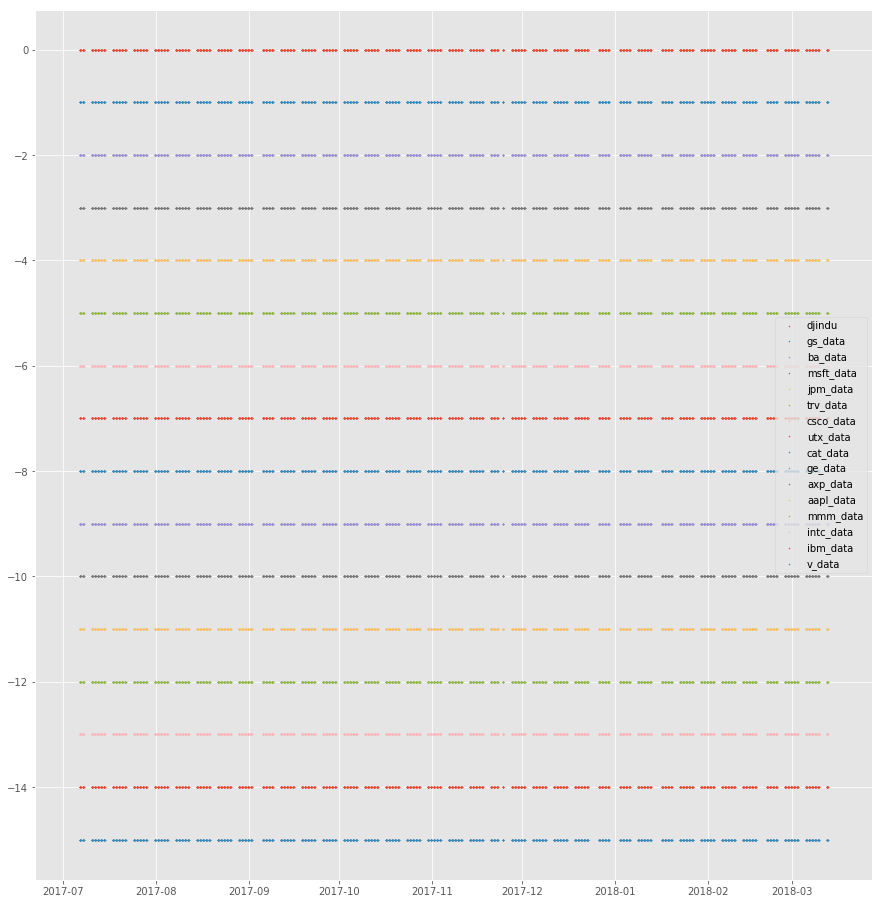

In [21]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs1):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

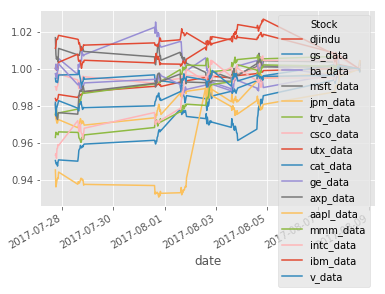

In [22]:
# View one day, normalized
data_window = df[200:300].copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Stock')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()
plt.savefig('normalised_data_plot.png', bbox_inches = 'tight', dpi = 800)

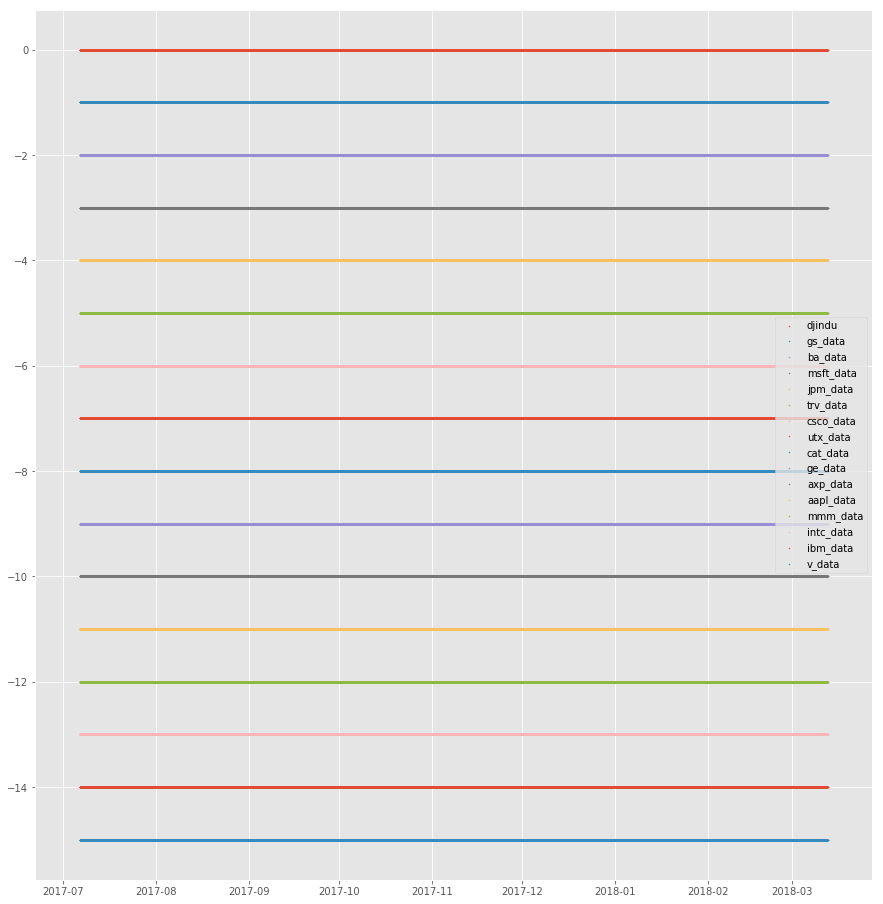

In [23]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

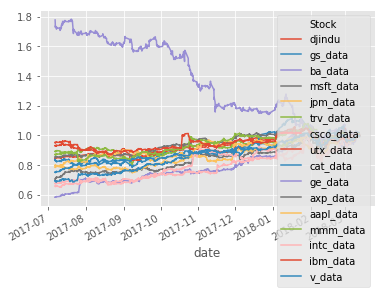

In [24]:
# View one day, normalized
data_window = df[0:30000].copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Stock')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()